In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
from xgboost import XGBRegressor

In [2]:
#训练模型+损失函数模型

#单独模型函数
def train_and_evaluate_model(model, features_train, features_valid, target_train, target_valid):
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    r2 = r2_score(target_valid, predictions)
    rmse = mean_squared_error(target_valid, predictions, squared=False)
    return r2, rmse

#多模型函数，利用单模型函数
def run_multiple_models(features, target_temperature, target_pressure, num_iterations=1000):
    models = {
        'Linear Regression': LinearRegression(),
        'Random Forest': RandomForestRegressor(),
        'Gradient Boosting': GradientBoostingRegressor(),
        'K Neighbors': KNeighborsRegressor(),
        'Decision Tree': DecisionTreeRegressor(),
        'XGBoost': XGBRegressor(),
        'Extra Trees': ExtraTreesRegressor()
    }

    # 为每个模型指定颜色
    colors = ['blue', 'green', 'orange', 'purple', 'brown', 'pink','red']

    # 检查颜色数量是否等于模型数量
    assert len(colors) == len(models), "Number of colors must be equal to the number of models"

    r2_values = {key: [] for key in models.keys()}
    rmse_values = {key: [] for key in models.keys()}

    for i in range(num_iterations):
        # 划分训练集和验证集
        features_train, features_valid, temp_train, temp_valid, pressure_train, pressure_valid = train_test_split(
            features, target_temperature, target_pressure, test_size=0.3
        )

        for (model_name, model), color in zip(models.items(), colors):
            temp_r2, temp_rmse = train_and_evaluate_model(model, features_train, features_valid, temp_train, temp_valid)
            pressure_r2, pressure_rmse = train_and_evaluate_model(model, features_train, features_valid, pressure_train, pressure_valid)

            r2_values[model_name].append((temp_r2, pressure_r2))
            rmse_values[model_name].append((temp_rmse, pressure_rmse))

    return r2_values, rmse_values, colors


In [3]:
# 读入和预处理
data = pd.read_csv('TP bal.csv',skiprows=[0]) 
data = data.dropna(axis=1, how='all')
data = data.drop(columns=['Sample_ID'])

In [4]:
# 将所有非数值型的数据替换为 NaN
data.replace('-', np.nan, inplace=True)

# 将每列的 NaN 值用该列的平均值填充
data = data.apply(lambda col: col.fillna(col.mean()))

Text(0.5, 1.0, 'Scatter Plot of Temperature vs. Pressure')

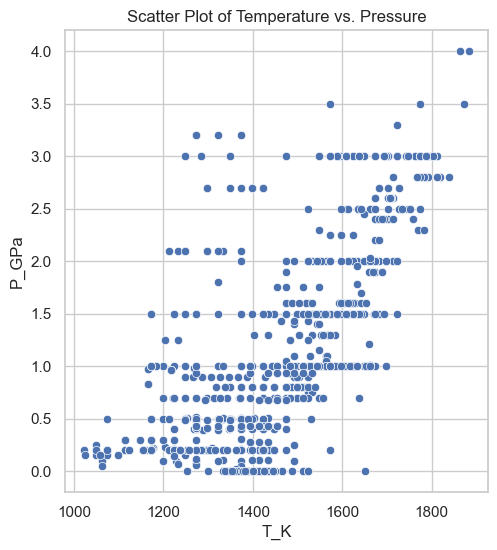

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# 创建散点图
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='T_K', y='P_GPa', data=data)
plt.title('Scatter Plot of Temperature vs. Pressure')



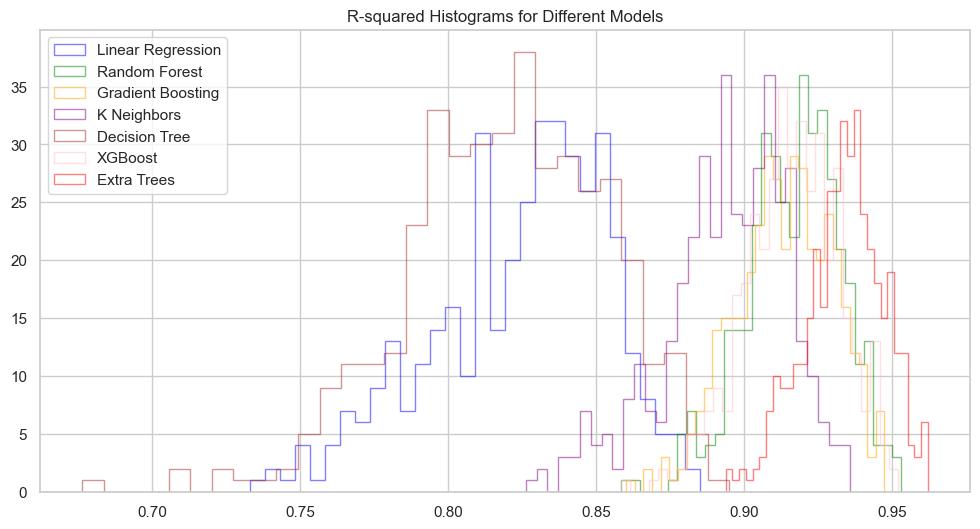

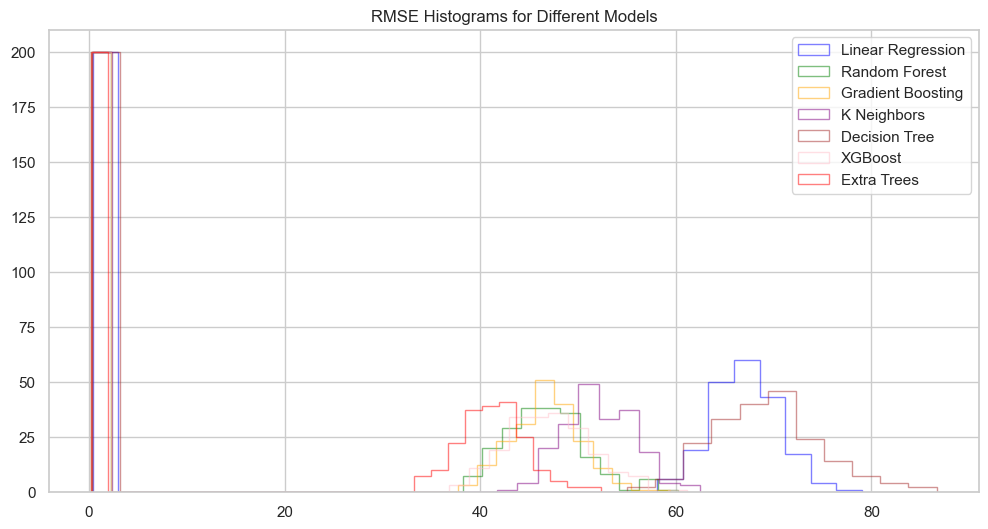

In [6]:
features = data.drop(columns=['T_K', 'P_GPa'])  # 排除 'T_K' 和 'P_GPa' 列
target_temperature = data['T_K']
target_pressure = data['P_GPa']


r2_values, rmse_values, colors = run_multiple_models(features, target_temperature, target_pressure, num_iterations=200)

# 画 R-squared 直方图
plt.figure(figsize=(12, 6))

for i, (model_name, r2_list) in enumerate(r2_values.items()):
    plt.hist(np.array(r2_list).flatten(), bins=30, alpha=0.5, label=model_name, histtype='step', edgecolor=colors[i], linewidth=1)

plt.title('R-squared Histograms for Different Models')
plt.legend()
plt.show()

# 画 RMSE 直方图
plt.figure(figsize=(12, 6))

for i, (model_name, rmse_list) in enumerate(rmse_values.items()):
    plt.hist(np.array(rmse_list).flatten(), bins=30, alpha=0.5, label=model_name, histtype='step', edgecolor=colors[i], linewidth=1)

plt.title('RMSE Histograms for Different Models')
plt.legend()
plt.show()